# LOADING THE LIBRARIES

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOADING THE DATA

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Replace 'file_id' with the actual file ID of your CSV file
file_id = '10KXibxogP7qznujFfQkrfw9kTdWQO-aF'


# Create a file instance using the file ID
file = drive.CreateFile({'id': file_id})
file.GetContentFile('online_retail.csv')


# Read the CSV file using pandas
df = pd.read_csv('online_retail.csv')

# Display the DataFrame
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  
0       2010-12-01 08:26:00       2.55       17850  United Kingdom  
1       2010-12-01 08:26:00       3.39       17850  United Kingdom  
2       2010-12-01 08:26:00       2.75       17850  United Kingdom  
3       2010-12-01 08:26:00       3.39       17850  United Kingdom  
4       2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                     ...        ...         ...             ...  
541904  2011-12-09 12:50:00       0.85       12680          France  
541905  2011-12-09 12:50:00       2.10       12680          France  
541906  2011-12-09 12:50:00       4.15       12680          France  
541907  2011-12-09 12:50:00       4.15       12680          France  
541908  2011-12-09 12:50:00       4.95       12680          France  

[541909 rows x 8 columns]

In [ ]:
check_duplicate_desc = df.groupby('StockCode').agg({'Description': 'nunique'}).reset_index()
check_duplicate_desc

StockCode  Description
0            10002            1
1            10080            2
2            10120            1
3           10123C            1
4           10123G            0
...            ...          ...
4065  gift_0001_20            2
4066  gift_0001_30            1
4067  gift_0001_40            1
4068  gift_0001_50            1
4069             m            1

[4070 rows x 2 columns]

In [ ]:
check_duplicate_desc[check_duplicate_desc['Description']==0]

StockCode  Description
4        10123G            0
9         10134            0
46        16053            0
85       17011A            0
157       20689            0
...         ...          ...
4046   DCGS0057            0
4047  DCGS0066P            0
4052   DCGS0071            0
4053   DCGS0072            0
4055   DCGS0074            0

[112 rows x 2 columns]

There are 112 products with no descriptions, hence we will be removing it

In [ ]:
# convert to data time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.sort_values(by = 'InvoiceDate', inplace = True)

In [ ]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541896    581587     22555            PLASTERS IN TIN STRONGMAN        12   
541895    581587     22556       PLASTERS IN TIN CIRCUS PARADE         12   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541900    581587     22730           ALARM CLOCK BAKELIKE IVORY         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55       17850  United Kingdom  
1      2010-12-01 08:26:00       3.39       17850  United Kingdom  
2      2010-12-01 08:26:00       2.75       17850  United Kingdom  
3      2010-12-01 08:26:00       3.39       17850  United Kingdom  
4      2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                    ...        ...         ...             ...  
541896 2011-12-09 12:50:00       1.65       12680          France  
541895 2011-12-09 12:50:00       1.65       12680          France  
541907 2011-12-09 12:50:00       4.15       12680          France  
541900 2011-12-09 12:50:00       3.75       12680          France  
541908 2011-12-09 12:50:00       4.95       12680          France  

[541909 rows x 8 columns]

In [ ]:
duplicate_stockcode = check_duplicate_desc[check_duplicate_desc['Description']>1].StockCode
duplicate_stockcode

1              10080
8              10133
26            15058A
28            15058C
31             16008
            ...     
3972          90195A
4008          90210D
4043        DCGS0003
4050        DCGS0069
4065    gift_0001_20
Name: StockCode, Length: 650, dtype: object

In [ ]:
data2 = df[df.StockCode.isin(duplicate_stockcode)].groupby('StockCode').agg({'Description': 'unique'}).reset_index()

In [ ]:
data2

StockCode                                        Description
0           10080             [GROOVY CACTUS INFLATABLE, nan, check]
1           10133            [COLOURING PENCILS BROWN TUBE, damaged]
2          15058A     [BLUE POLKADOT GARDEN PARASOL, nan, wet/rusty]
3          15058C       [ICE CREAM DESIGN GARDEN PARASOL, wet/rusty]
4           16008       [SMALL FOLDING SCISSOR(POINTED EDGE), check]
..            ...                                                ...
645        90195A                  [PURPLE GEMSTONE BRACELET, check]
646        90210D             [PURPLE ACRYLIC FACETED BANGLE, check]
647      DCGS0003                        [BOXED GLASS ASHTRAY, ebay]
648      DCGS0069                      [OOH LA LA DOGS COLLAR, ebay]
649  gift_0001_20  [Dotcomgiftshop Gift Voucher £20.00, to push o...

[650 rows x 2 columns]

In [ ]:
data2['Description_len']  = data2['Description'].apply(lambda x: [len(str(i)) for i in x ] )
data2

StockCode                                        Description  \
0           10080             [GROOVY CACTUS INFLATABLE, nan, check]   
1           10133            [COLOURING PENCILS BROWN TUBE, damaged]   
2          15058A     [BLUE POLKADOT GARDEN PARASOL, nan, wet/rusty]   
3          15058C       [ICE CREAM DESIGN GARDEN PARASOL, wet/rusty]   
4           16008       [SMALL FOLDING SCISSOR(POINTED EDGE), check]   
..            ...                                                ...   
645        90195A                  [PURPLE GEMSTONE BRACELET, check]   
646        90210D             [PURPLE ACRYLIC FACETED BANGLE, check]   
647      DCGS0003                        [BOXED GLASS ASHTRAY, ebay]   
648      DCGS0069                      [OOH LA LA DOGS COLLAR, ebay]   
649  gift_0001_20  [Dotcomgiftshop Gift Voucher £20.00, to push o...   

    Description_len  
0        [24, 3, 5]  
1           [28, 7]  
2        [28, 3, 9]  
3           [31, 9]  
4           [35, 5]  
..              ...  
645         [24, 5]  
646         [29, 5]  
647         [19, 4]  
648         [21, 4]  
649        [34, 35]  

[650 rows x 3 columns]

In [ ]:
data2['maxindex'] = data2['Description_len'].apply(lambda x: pd.Series(x).idxmax())

In [ ]:
data2['Description']= data2.apply(lambda x: x['Description'][x['maxindex']], axis = 1)


In [ ]:
data2

StockCode                          Description Description_len  \
0           10080             GROOVY CACTUS INFLATABLE      [24, 3, 5]   
1           10133         COLOURING PENCILS BROWN TUBE         [28, 7]   
2          15058A         BLUE POLKADOT GARDEN PARASOL      [28, 3, 9]   
3          15058C      ICE CREAM DESIGN GARDEN PARASOL         [31, 9]   
4           16008  SMALL FOLDING SCISSOR(POINTED EDGE)         [35, 5]   
..            ...                                  ...             ...   
645        90195A             PURPLE GEMSTONE BRACELET         [24, 5]   
646        90210D        PURPLE ACRYLIC FACETED BANGLE         [29, 5]   
647      DCGS0003                  BOXED GLASS ASHTRAY         [19, 4]   
648      DCGS0069                OOH LA LA DOGS COLLAR         [21, 4]   
649  gift_0001_20  to push order througha s stock was         [34, 35]   

     maxindex  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
645         0  
646         0  
647         0  
648         0  
649         1  

[650 rows x 4 columns]

Column Descriptors
- StockCode: A code used to identify the product that was purchased
- Description: A brief description of the product that was purchased
- Quantity: The quantity of the product that was purchased
- InvoiceDate: The date and time that the purchase was made
- UnitPrice: The price of one unit of the product that was purchased
- CustomerID: The unique identifier for the customer who made the purchase
- Country: The country where the customer who made the purchase is located

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


#### We see that there are total 8 variables, out of which 5 are catogerical, 2 are integer values and one is float

# DATA CLEANING

## A) WORKING ON MISSING & DUPLICATE VALUES




In [ ]:
variables = []
dtypes = []
count = []
unique = []
missing = []
percent_missing = []

for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing_count = df[item].isna().sum()
    missing.append(missing_count)
    percent_missing.append((missing_count / len(df[item])) * 100)

output = pd.DataFrame({
    'variable': variables,
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing,
    'percent_missing': percent_missing
})


# Display the resulting DataFrame
print(output)

      variable    dtype   count  unique  missing  percent_missing
0    InvoiceNo   object  541909   25900        0         0.000000
1    StockCode   object  541909    4070        0         0.000000
2  Description   object  541909    4224     1454         0.268311
3     Quantity    int64  541909     722        0         0.000000
4  InvoiceDate   object  541909   23260        0         0.000000
5    UnitPrice  float64  541909    1630        0         0.000000
6   CustomerID    int64  541909    4372        0         0.000000
7      Country   object  541909      38        0         0.000000


In [ ]:
missing_rows_df = df[df.isnull().any(axis=1)]
missing_rows_df

InvoiceNo StockCode Description  Quantity          InvoiceDate  \
622       536414     22139         NaN        56  2010-12-01 11:52:00   
1970      536545     21134         NaN         1  2010-12-01 14:32:00   
1971      536546     22145         NaN         1  2010-12-01 14:33:00   
1972      536547     37509         NaN         1  2010-12-01 14:33:00   
1987      536549    85226A         NaN         1  2010-12-01 14:34:00   
...          ...       ...         ...       ...                  ...   
535322    581199     84581         NaN        -2  2011-12-07 18:26:00   
535326    581203     23406         NaN        15  2011-12-07 18:31:00   
535332    581209     21620         NaN         6  2011-12-07 18:35:00   
536981    581234     72817         NaN        27  2011-12-08 10:33:00   
538554    581408     85175         NaN        20  2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0       15287  United Kingdom  
1970          0.0       15287  United Kingdom  
1971          0.0       15287  United Kingdom  
1972          0.0       15287  United Kingdom  
1987          0.0       15287  United Kingdom  
...           ...         ...             ...  
535322        0.0       15287  United Kingdom  
535326        0.0       15287  United Kingdom  
535332        0.0       15287  United Kingdom  
536981        0.0       15287  United Kingdom  
538554        0.0       15287  United Kingdom  

[1454 rows x 8 columns]

OBSERVATIONS
- "InvoiceNo" : There are about 25900 unique transections
- "StockCode" : There are about 4070 products that are bought in this tranections
- "InvoiceDate" : We need to convert invoice data to data time format from object format
- "CustomerID" : there rare 4372 unique customers

#### There are 1454 missing values in the Description column i.e about 0.26%, We will drop thes values as they are very less

> Indented block



In [ ]:
# Drop rows with null values
df1 = df.dropna()
df1

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55       17850  United Kingdom  
1      2010-12-01 08:26:00       3.39       17850  United Kingdom  
2      2010-12-01 08:26:00       2.75       17850  United Kingdom  
3      2010-12-01 08:26:00       3.39       17850  United Kingdom  
4      2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85       12680          France  
541905 2011-12-09 12:50:00       2.10       12680          France  
541906 2011-12-09 12:50:00       4.15       12680          France  
541907 2011-12-09 12:50:00       4.15       12680          France  
541908 2011-12-09 12:50:00       4.95       12680          France  

[540455 rows x 8 columns]

In [ ]:
# checking duplicated values
print(f"Total duplicated values = {df.duplicated().sum()}")
print(f"Total duplicated values in %age = {df.duplicated().mean()*100}%")

Total duplicated values = 5268
Total duplicated values in %age = 0.9721189350979592%


[link text](https://)#### there are about 1% duplicate rows, we will drop this rows

In [ ]:
# droping duplicated values
df1.drop_duplicates(inplace = True)
df1

<ipython-input-31-9771d854eba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace = True)


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55       17850  United Kingdom  
1      2010-12-01 08:26:00       3.39       17850  United Kingdom  
2      2010-12-01 08:26:00       2.75       17850  United Kingdom  
3      2010-12-01 08:26:00       3.39       17850  United Kingdom  
4      2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85       12680          France  
541905 2011-12-09 12:50:00       2.10       12680          France  
541906 2011-12-09 12:50:00       4.15       12680          France  
541907 2011-12-09 12:50:00       4.15       12680          France  
541908 2011-12-09 12:50:00       4.95       12680          France  

[535187 rows x 8 columns]

## B) WORKNG ON THE DIFFERENT COLUMNS HAVING NEGATIVE DATA

In [ ]:
df1.describe().T

count          mean          std       min       25%       50%  \
Quantity    535187.0      9.671593   219.059056 -80995.00      1.00      3.00   
UnitPrice   535187.0      4.645242    97.364810 -11062.06      1.25      2.08   
CustomerID  535187.0  15282.618281  1484.769684  12346.00  14356.00  15287.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16242.00  18287.0

OBSERVATIONS
- "Quantity": We see here that the qualtity of the product is high as well as negative. Possibility of distributer biing the procuts for high quantity and fow negative quantities I guess we need to work over these rows
- "InvoiceDate" : 28/03 2010 to 09/12/2011
- "UnitPrice": In unit price aslo tere are negative price, which is not desirable. We will furter analyse the same
- CuctomerID  seems to be a numeri value ranging from 14356 to 18287, around 4000 customers

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.7230e+03,
        5.2546e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-80995., -64796., -48597., -32398., -16199.,      0.,  16199.,
         32398.,  48597.,  64796.,  80995.]),
 <BarContainer object of 10 artists>)

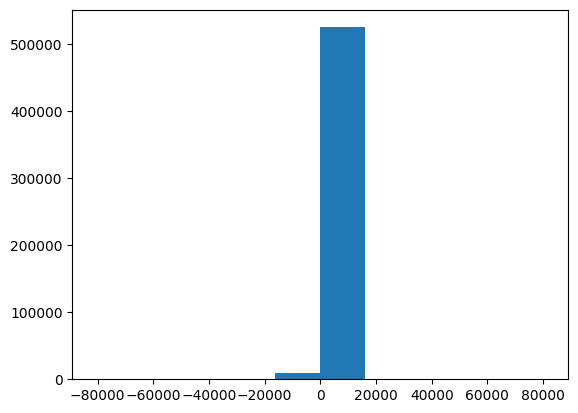

In [ ]:
plt.hist(df1.Quantity)

In [ ]:
df1[df1.Quantity<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50       14527  United Kingdom  
154    2010-12-01 09:49:00       4.65       15311  United Kingdom  
235    2010-12-01 10:24:00       1.65       17548  United Kingdom  
236    2010-12-01 10:24:00       0.29       17548  United Kingdom  
237    2010-12-01 10:24:00       0.29       17548  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83       14397  United Kingdom  
541541 2011-12-09 10:28:00     224.69       15498  United Kingdom  
541715 2011-12-09 11:57:00      10.95       15311  United Kingdom  
541716 2011-12-09 11:58:00       1.25       17315  United Kingdom  
541717 2011-12-09 11:58:00       1.25       17315  United Kingdom  

[9725 rows x 8 columns]

We see that some of the entries in the StockCode columns like D,m,etc are not product entries. Hence we further see if we can identify such entries in the data.

In [ ]:
df1['CharCount'] = df1['StockCode'].apply(len)
df1[df1['CharCount']<4].StockCode.unique()

<ipython-input-36-6b06b76427d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CharCount'] = df1['StockCode'].apply(len)


array(['D', 'C2', 'DOT', 'M', 'S', 'm', 'B'], dtype=object)



```
# This is formatted as code
```

We see that ['D', 'C2', 'DOT', 'M', 'S', 'm', 'B'] these are some of the entries that we can further chech and remove is not relevant

In [ ]:
# Specify the stock codes to find descriptions for
target_stock_codes = ['D', 'C2', 'DOT', 'M', 'S', 'm', 'B']

# Filter the DataFrame for the specified stock codes
filtered_df = df1[df1['StockCode'].isin(target_stock_codes)]
# Drop duplicates to keep only one description for each unique stock code
unique_descriptions_df = filtered_df.drop_duplicates(subset='StockCode')[['StockCode', 'Description']]

print("\nOne Description for Each Specified Stock Code:")
unique_descriptions_df


One Description for Each Specified Stock Code:


StockCode      Description
141            D         Discount
1423          C2         CARRIAGE
1814         DOT   DOTCOM POSTAGE
2239           M           Manual
14436          S          SAMPLES
40383          m           Manual
299982         B  Adjust bad debt

In [ ]:
count_before = df['StockCode'].isin(target_stock_codes).sum()
count_before

1569

As this entries are very less as well as these are not product entries, we will drop this entries.

In [ ]:
df1 = df1[~df1['StockCode'].isin(target_stock_codes)]
df1

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  CharCount  
0      2010-12-01 08:26:00       2.55       17850  United Kingdom          6  
1      2010-12-01 08:26:00       3.39       17850  United Kingdom          5  
2      2010-12-01 08:26:00       2.75       17850  United Kingdom          6  
3      2010-12-01 08:26:00       3.39       17850  United Kingdom          6  
4      2010-12-01 08:26:00       3.39       17850  United Kingdom          6  
...                    ...        ...         ...             ...        ...  
541904 2011-12-09 12:50:00       0.85       12680          France          5  
541905 2011-12-09 12:50:00       2.10       12680          France          5  
541906 2011-12-09 12:50:00       4.15       12680          France          5  
541907 2011-12-09 12:50:00       4.15       12680          France          5  
541908 2011-12-09 12:50:00       4.95       12680          France          5  

[533626 rows x 9 columns]

Lets further see if there are more negative values further to be worked upon

In [ ]:
df1[df1.Quantity<0]

InvoiceNo StockCode                        Description  Quantity  \
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
...          ...       ...                                ...       ...   
540448   C581490     22178    VICTORIAN GLASS HANGING T-LIGHT       -12   
540449   C581490     23144    ZINC T-LIGHT HOLDER STARS SMALL       -11   
541715   C581568     21258         VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978   HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979      36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  CharCount  
154    2010-12-01 09:49:00       4.65       15311  United Kingdom          6  
235    2010-12-01 10:24:00       1.65       17548  United Kingdom          5  
236    2010-12-01 10:24:00       0.29       17548  United Kingdom          5  
237    2010-12-01 10:24:00       0.29       17548  United Kingdom          5  
238    2010-12-01 10:24:00       0.29       17548  United Kingdom          5  
...                    ...        ...         ...             ...        ...  
540448 2011-12-09 09:57:00       1.95       14397  United Kingdom          5  
540449 2011-12-09 09:57:00       0.83       14397  United Kingdom          5  
541715 2011-12-09 11:57:00      10.95       15311  United Kingdom          5  
541716 2011-12-09 11:58:00       1.25       17315  United Kingdom          5  
541717 2011-12-09 11:58:00       1.25       17315  United Kingdom          5  

[9341 rows x 9 columns]

Considering this entries are product entries for the rerurned products we will convert this entries to absolute values as these can also be a part of out recommendation engine.

In [ ]:
df1.Quantity = abs(df1['Quantity'])

<ipython-input-41-1af569856c97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Quantity = abs(df1['Quantity'])


In [ ]:
df1[df1.Quantity<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CharCount]
Index: []

Now that we have processed the quantity column, lets further analyse the "UnitPrice" Column

(array([5.33593e+05, 1.00000e+00, 6.00000e+00, 1.40000e+01, 4.00000e+00,
        0.00000e+00, 1.00000e+00, 4.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([    0.   ,  1783.646,  3567.292,  5350.938,  7134.584,  8918.23 ,
        10701.876, 12485.522, 14269.168, 16052.814, 17836.46 ]),
 <BarContainer object of 10 artists>)

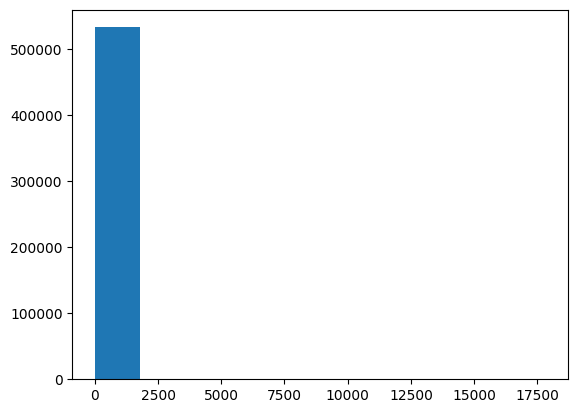

In [ ]:
plt.hist(df1.UnitPrice)

In [ ]:
df1[df1.UnitPrice<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CharCount]
Index: []

As we have worked in the "StockCode", hence we see that there seem to be no "UnitProce" negative values. That means we are good with these two columns

# EDA

### A) QUANTITY COLUMN DATA ANALYSIS

Top 10 Customers by Quantity

In [ ]:
customer_totals = df1.groupby('CustomerID')['Quantity'].sum()

# sort the customer_totals by Quantity in descending order
sorted_totals = customer_totals.sort_values(ascending=False)

# get the top 10 customer IDs
top_10_customers = sorted_totals.head(10)

print("Top 10 Customers by Quantity:")
print(top_10_customers)

Top 10 Customers by Quantity:
CustomerID
15287    609397
14646    197782
16446    161992
12346    148430
14911     83735
12415     78098
17450     70931
17511     66085
13694     64720
18102     64124
Name: Quantity, dtype: int64


### B) UNIT_PRICE DATA ANALYSIS

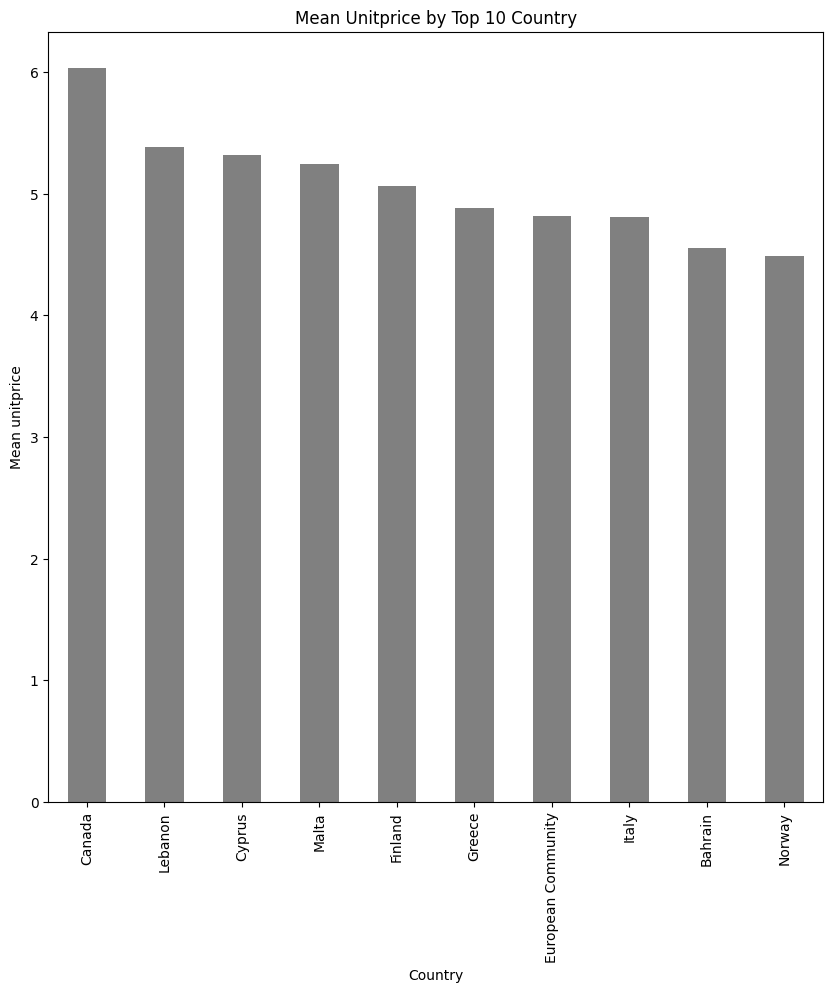

In [ ]:
# unitprice vs Country
# Grouping data by country and calculating total sales
# Sorting data in descending order and selecting the first 10 values
mean_quantity_by_country = df1.groupby('Country')['UnitPrice'].mean().sort_values(ascending =False)[:10]
plt.figure(figsize=(10, 10))
mean_quantity_by_country.plot(kind='bar', color ='Grey')
plt.xticks(rotation=90)
plt.title('Mean Unitprice by Top 10 Country')
plt.xlabel('Country')
plt.ylabel('Mean unitprice')
plt.show()

In [ ]:
customer_totals = df1.groupby('CustomerID')['UnitPrice'].sum()

# sort the customer_totals by Quantity in descending order
sorted_totals = customer_totals.sort_values(ascending=False)

# get the top 10 customer IDs
top_10_customers = sorted_totals.head(10)

print("Top 10 Customers by UnitPrice:")
print(top_10_customers)

Top 10 Customers by UnitPrice:
CustomerID
15287    588772.00
14096     21426.09
17841     19925.88
14911     19617.10
16029     16909.72
12748     10640.10
14606      7745.21
15311      6245.10
14527      5225.61
14646      5193.59
Name: UnitPrice, dtype: float64


Top 10 Products by quantity and unitprice

### C) SALES COLUMN CREATION & DATA ANALYSIS

In [ ]:
# Create column of sales
# Sales = qty * price
df1['Sales'] = df1['Quantity'] * df1['UnitPrice']
df1['Sales'].head()

<ipython-input-65-41fc2b3aa36d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sales'] = df1['Quantity'] * df1['UnitPrice']


0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Sales, dtype: float64

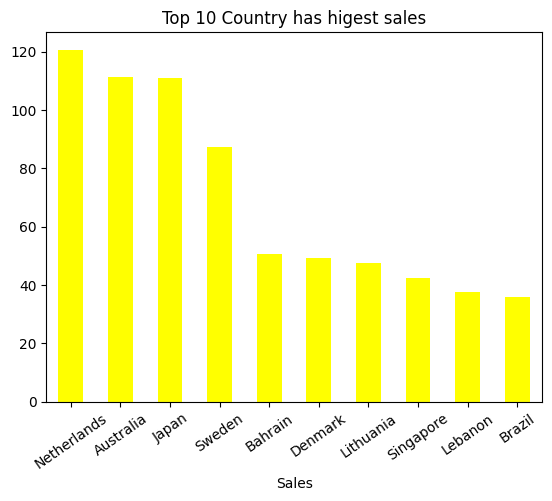

In [ ]:
# 1. which country has higest sales
df_country = df1.groupby('Country')['Sales'].mean().sort_values(ascending =False)[:10]
df_country.plot(kind='bar', color ='yellow')
plt.title("Top 10 Country has higest sales")
plt.xlabel('Sales')
plt.xticks(rotation=35)
plt.show()

### D) CUSTOMER COLUMN DATA ANALYSIS

In [ ]:
customer_totals = df1.groupby('CustomerID')['Sales'].sum()

# sort the customer_totals by Quantity in descending order
sorted_totals = customer_totals.sort_values(ascending=False)

# get the top 10 customer IDs
top_10_customers = sorted_totals.head(10)

print("Top 10 Customers by Sales:")
print(top_10_customers)

Top 10 Customers by Sales:
CustomerID
15287    1516391.52
16446     336942.10
14646     280611.02
18102     259657.30
17450     200144.45
12346     154367.20
14911     143555.42
12415     126103.61
14156     119434.39
16029     101331.75
Name: Sales, dtype: float64


### E) COUNTRY COLUMN BASED DATA ANALYSIS

In [ ]:
df_country = df1.groupby(by=['Country']).sum()
df_quantity = df_country['Quantity']
df_sorted = df_quantity.sort_values(ascending=False)
df_sorted

<ipython-input-52-123a75bee2dd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country = df1.groupby(by=['Country']).sum()


Country
United Kingdom          5095169
Netherlands              201265
EIRE                     151946
Germany                  120955
France                   113651
Australia                 84755
Sweden                    36523
Switzerland               30923
Spain                     29068
Japan                     26811
Belgium                   23322
Norway                    19423
Portugal                  16294
Finland                   10740
Channel Islands            9492
Denmark                    8282
Italy                      8223
Cyprus                     6382
Singapore                  5234
Austria                    4935
Hong Kong                  4711
Israel                     4462
USA                        3882
Poland                     3715
Unspecified                3295
Canada                     2763
Iceland                    2458
Greece                     1558
Malta                       996
United Arab Emirates        982
Czech Republic              750


United kingdon has the most sales



### F) TIME COLUMN BASED DATA ANALYSIS

Which year that have the most sales?

In [ ]:
df1['Year'] = df1['InvoiceDate'].dt.year
sales_by_year = df1.groupby('Year')['Quantity'].sum()
sales_by_year

<ipython-input-55-a224d41ede43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1['InvoiceDate'].dt.year


Year
2010     375997
2011    5659667
Name: Quantity, dtype: int64

There are more sales in 2011

<ipython-input-57-b5758111c134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = df1['InvoiceDate'].dt.month


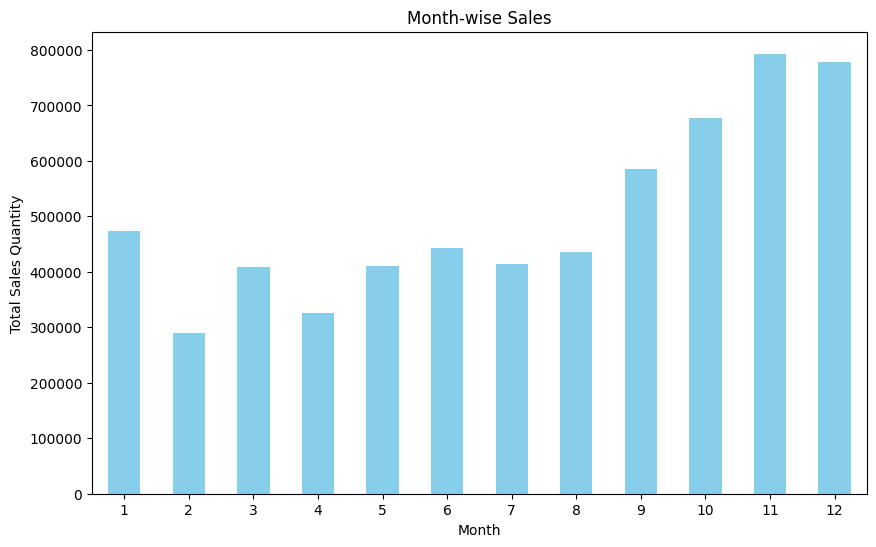

In [ ]:
df1['Month'] = df1['InvoiceDate'].dt.month

# Grouping by month and summing the 'Quantity' column
sales_by_month = df1.groupby('Month')['Quantity'].sum()

# Plotting the results
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Month-wise Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=0)
plt.show()

<ipython-input-61-719320a36a61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DayOfWeek'] = df1['InvoiceDate'].dt.dayofweek


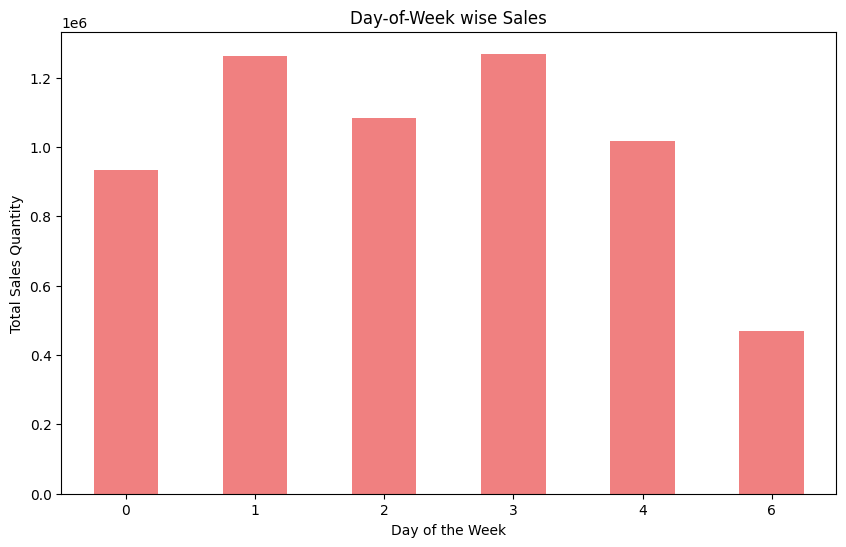

In [ ]:
# Extracting the day of the week from 'InvoiceDate'
df1['DayOfWeek'] = df1['InvoiceDate'].dt.dayofweek

# Grouping by day of the week and summing the 'Quantity' column
sales_by_day = df1.groupby('DayOfWeek')['Quantity'].sum()

# Plotting the results directly from the DataFrame
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='lightcoral')
plt.title('Day-of-Week wise Sales')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Create new column with time interval labels
df1['Time'] = df1['InvoiceDate'].dt.hour
df1['Time of Day'] = ['Early Morning' if x < 6 else ('Morning' if x < 12 else ('Noon' if x < 14 else ('Afternoon' if x < 18 else ('Evening' if x < 22 else 'Night')))) for x in df1['Time']]

<ipython-input-95-693773f02659>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day = df1.groupby(by=['Time']).sum()['Sales'].plot(kind='line',figsize=(12,8), color ='grey')


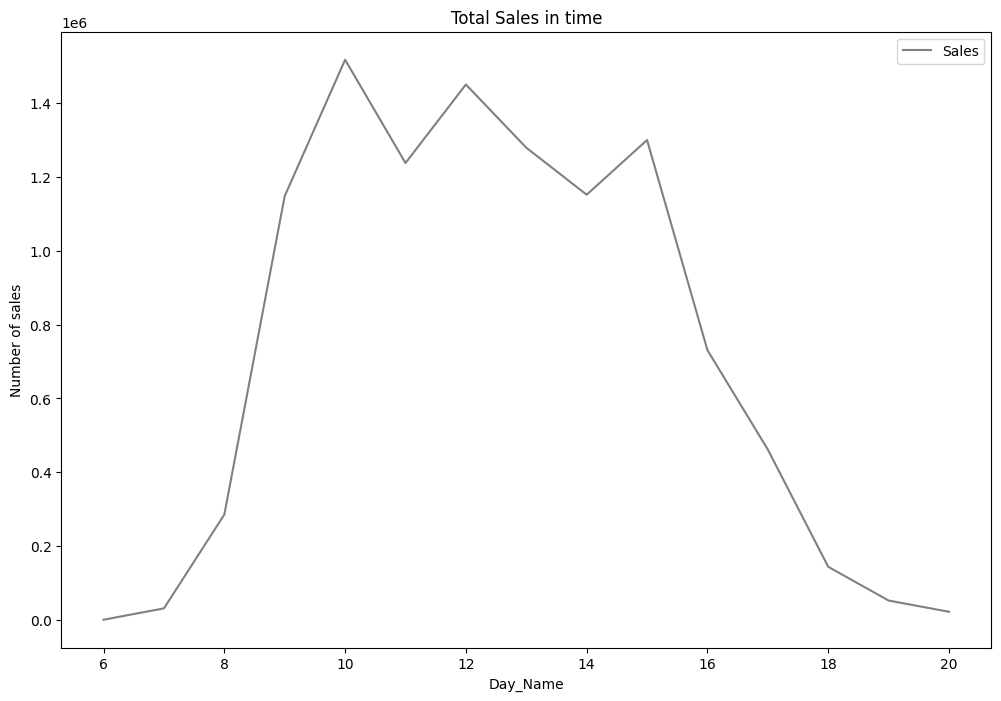

In [ ]:
df_day = df1.groupby(by=['Time']).sum()['Sales'].plot(kind='line',figsize=(12,8), color ='grey')
plt.title('Total Sales in time')
plt.ylabel('Number of sales')
plt.xlabel('Day_Name')
plt.legend()
plt.show()

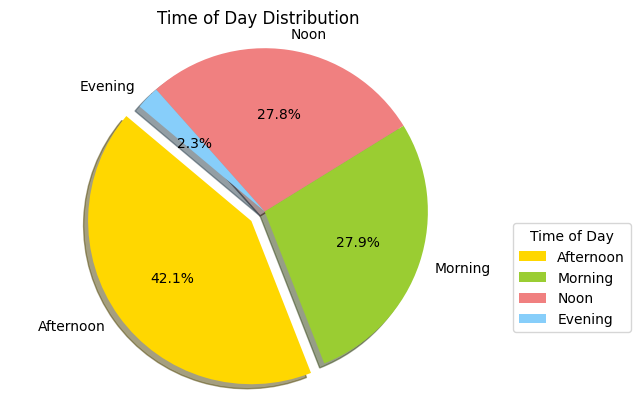

In [ ]:
counts = df1['Time of Day'].value_counts()

# Data
labels = counts.index.tolist()
sizes = counts.tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Time of Day Distribution')

plt.axis('equal')
plt.legend(title='Time of Day', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

### F) DISCRIPTION COLUMN BASED DATA ANALYSIS

Further processing the Description column

<ipython-input-74-9295811504d9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales_item_2010 = df1.groupby(['Description','Year']).mean()
<ipython-input-74-9295811504d9>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales_item_2011 = df1.groupby(['Description','Year']).mean()


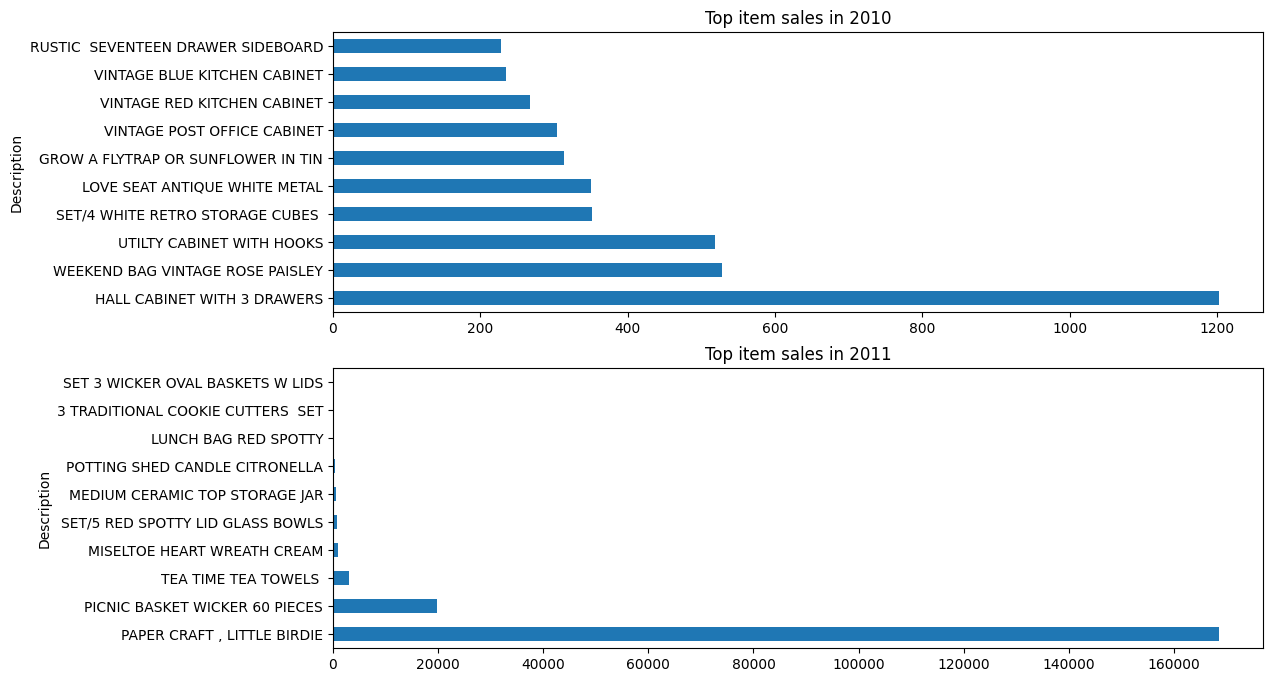

In [ ]:
plt.subplot(2,1,1)
# creating the bar plot
df_sales_item_2010 = df1.groupby(['Description','Year']).mean()
df_sales_item_2010 = df_sales_item_2010.unstack('Year')['Sales']
df_sales_item_2010 = df_sales_item_2010.sort_values(2010,ascending=False)[2010].head(10).plot(kind='barh',figsize=(12,8))
plt.title("Top item sales in 2010")
plt.subplot(2,1,2)
df_sales_item_2011 = df1.groupby(['Description','Year']).mean()
df_sales_item_2011 = df_sales_item_2011.unstack('Year')['Sales']
df_sales_item_2011 = df_sales_item_2011.sort_values(2011,ascending=False)[2011].head(10).plot(kind='barh',figsize=(12,8))

plt.title("Top item sales in 2011")
plt.show()

Amazon Fee & Bank charges are the items that we can drop as that is not product

1.   List item
2.   List item



In [ ]:
df1 = df1[df1['Description'] != 'AMAZON FEE']
df1 = df1[df1['Description'] != 'Bank Charges']
df1 = df1[df1['Description'] != 'CRUK Commission']
df1

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  CharCount  \
0      2010-12-01 08:26:00       2.55       17850  United Kingdom          6   
1      2010-12-01 08:26:00       3.39       17850  United Kingdom          5   
2      2010-12-01 08:26:00       2.75       17850  United Kingdom          6   
3      2010-12-01 08:26:00       3.39       17850  United Kingdom          6   
4      2010-12-01 08:26:00       3.39       17850  United Kingdom          6   
...                    ...        ...         ...             ...        ...   
541904 2011-12-09 12:50:00       0.85       12680          France          5   
541905 2011-12-09 12:50:00       2.10       12680          France          5   
541906 2011-12-09 12:50:00       4.15       12680          France          5   
541907 2011-12-09 12:50:00       4.15       12680          France          5   
541908 2011-12-09 12:50:00       4.95       12680          France          5   

        Year  Month  DayOfWeek  Sales  
0       2010     12          2  15.30  
1       2010     12          2  20.34  
2       2010     12          2  22.00  
3       2010     12          2  20.34  
4       2010     12          2  20.34  
...      ...    ...        ...    ...  
541904  2011     12          4  10.20  
541905  2011     12          4  12.60  
541906  2011     12          4  16.60  
541907  2011     12          4  16.60  
541908  2011     12          4  14.85  

[533539 rows x 13 columns]

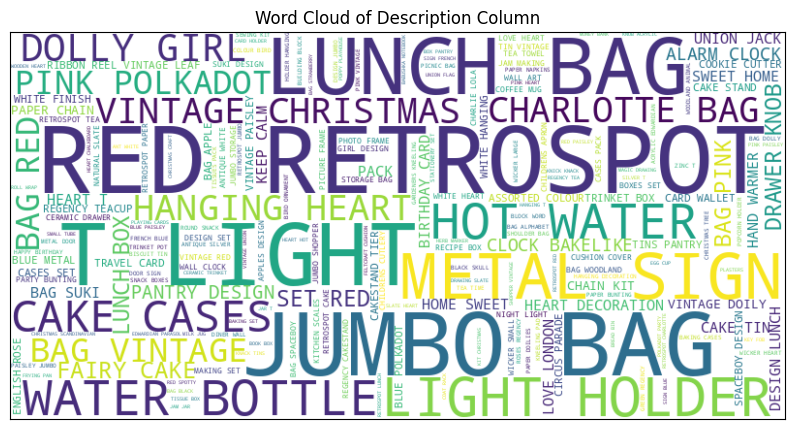

In [ ]:
text = ' '.join(df1['Description'].dropna().astype(str).values)

# Create a WordCloud object
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Display the word cloud on the axis
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Word Cloud of Description Column')

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

Word Count Month Wise

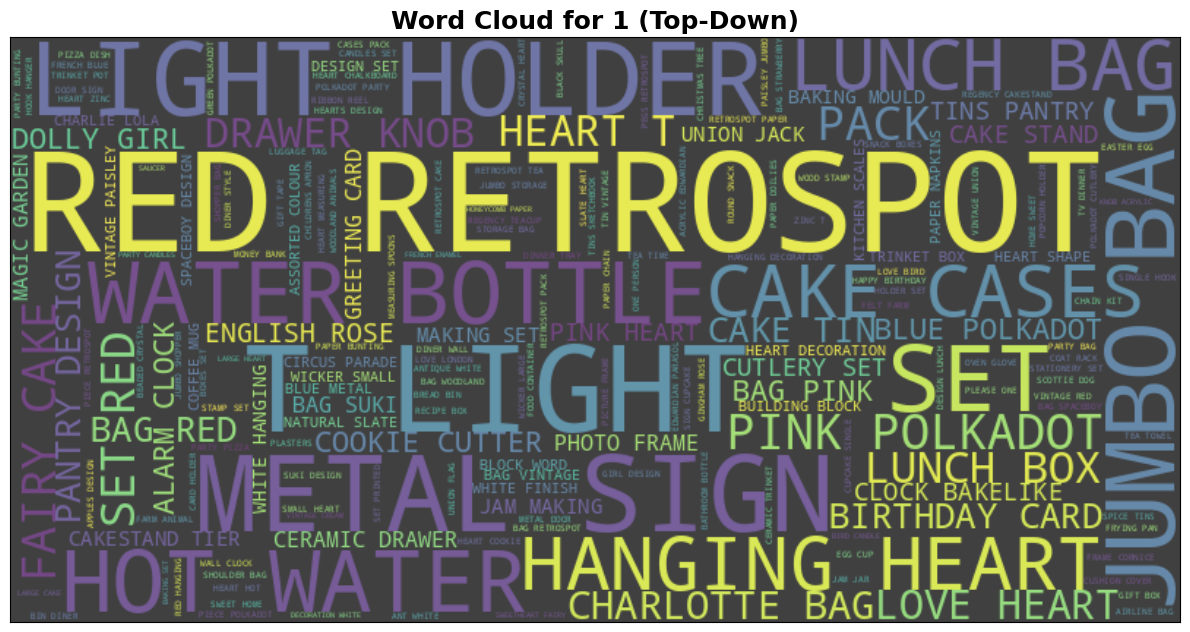

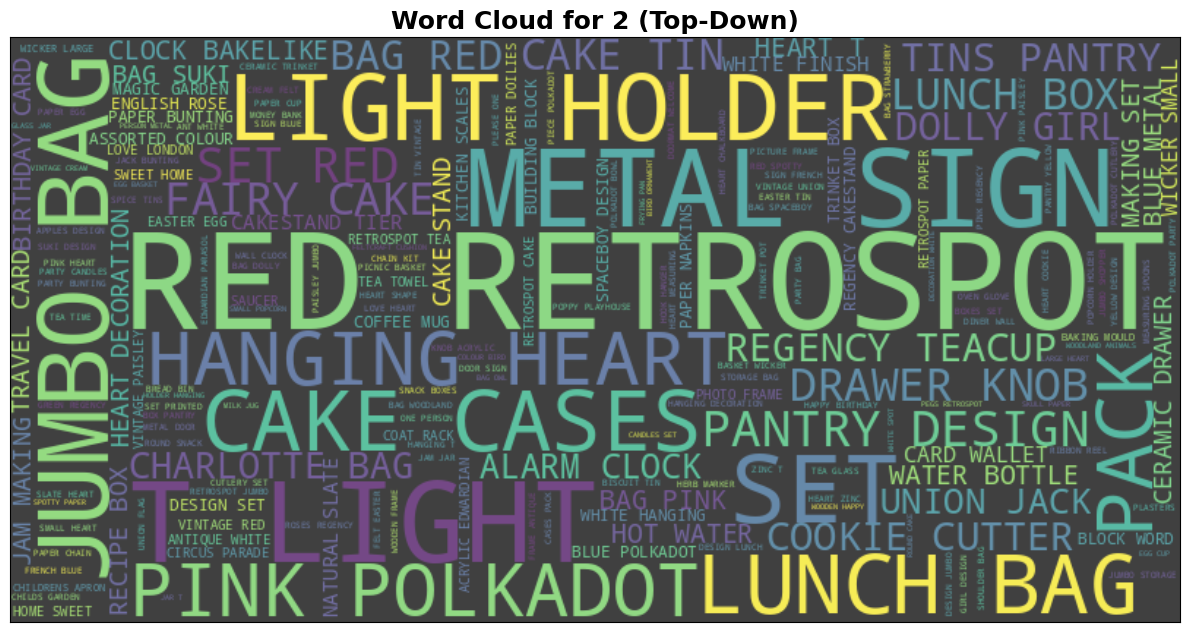

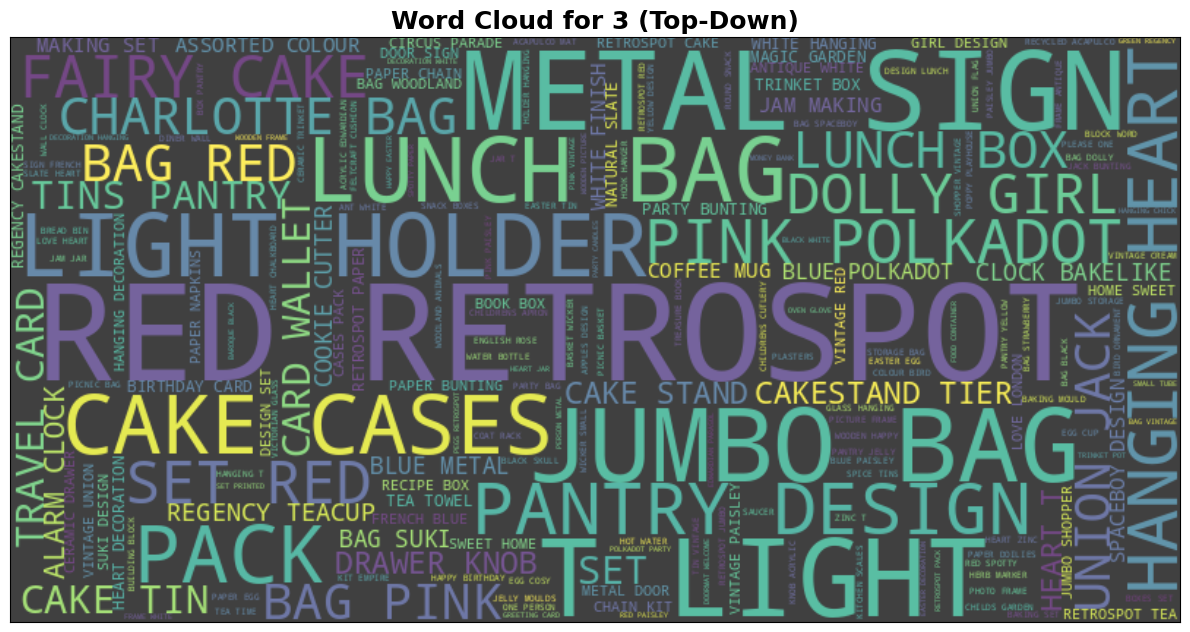

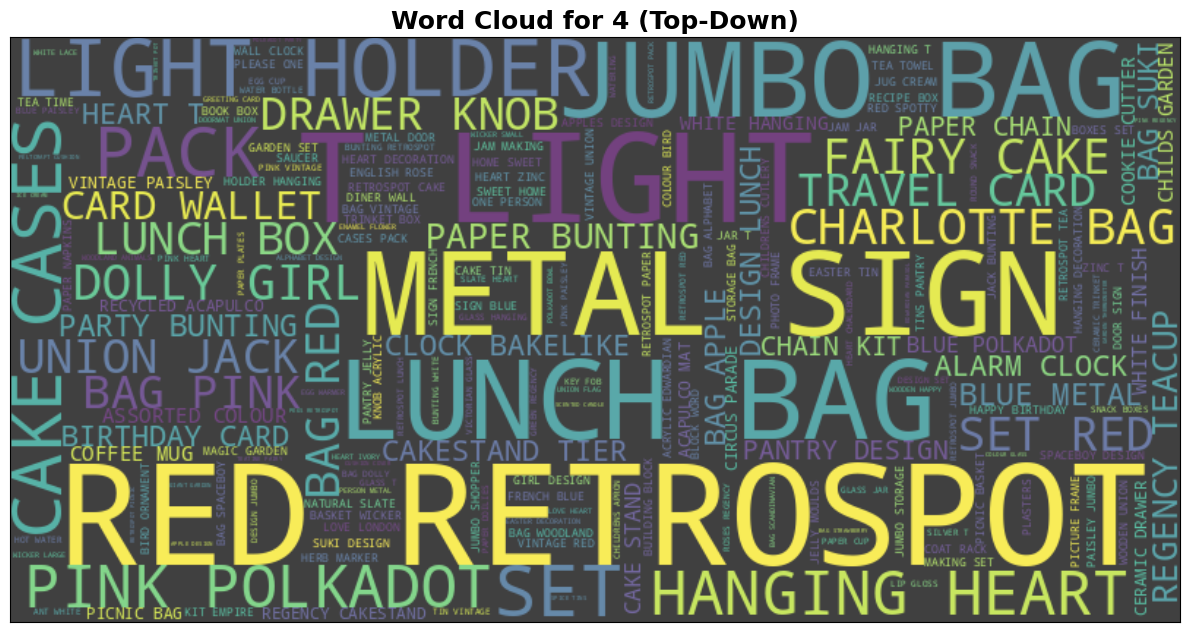

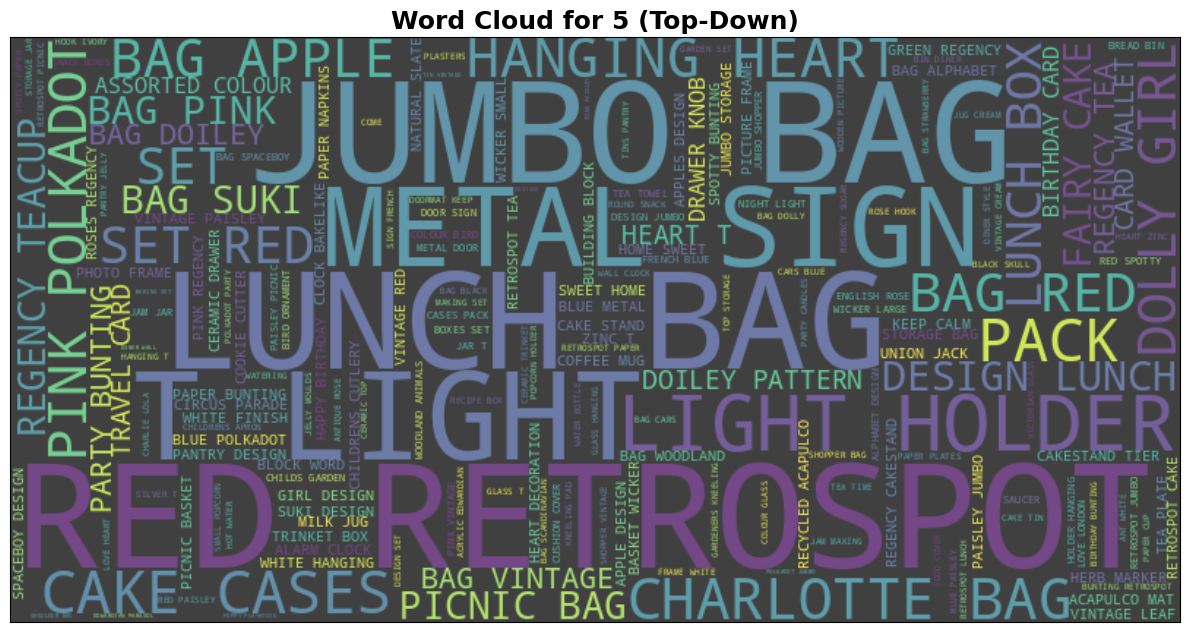

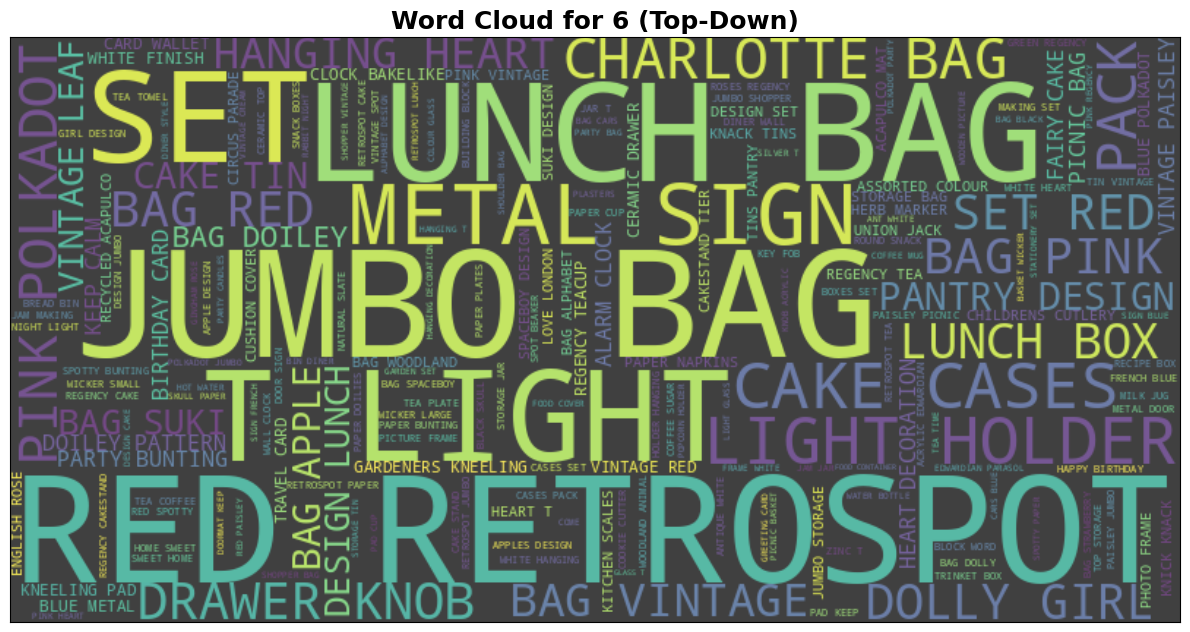

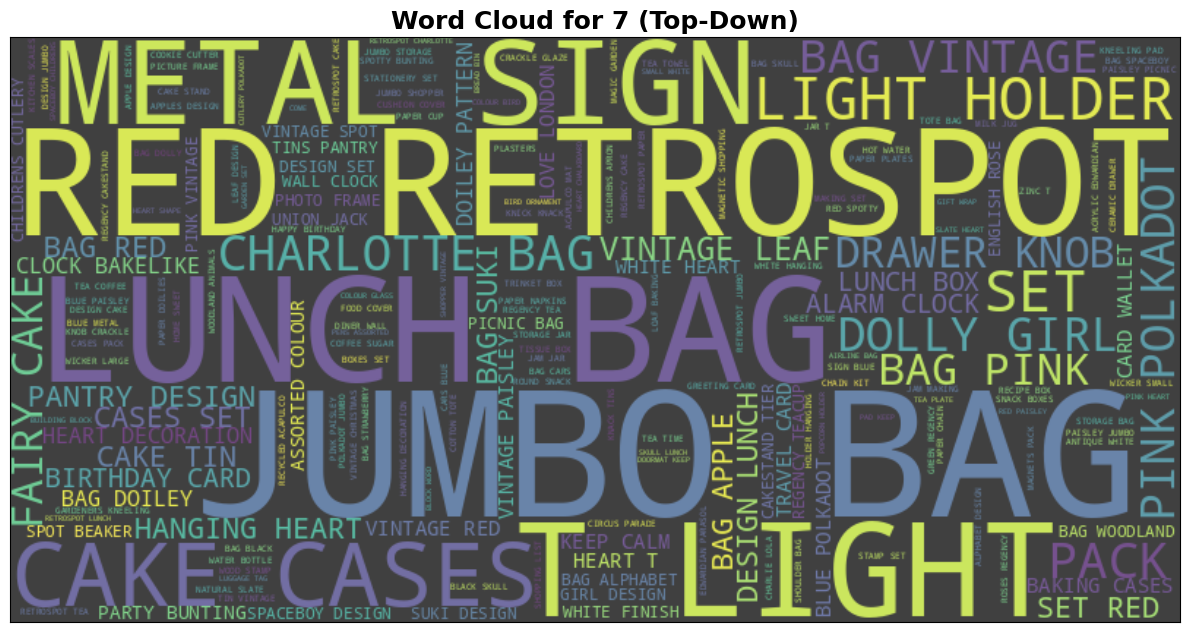

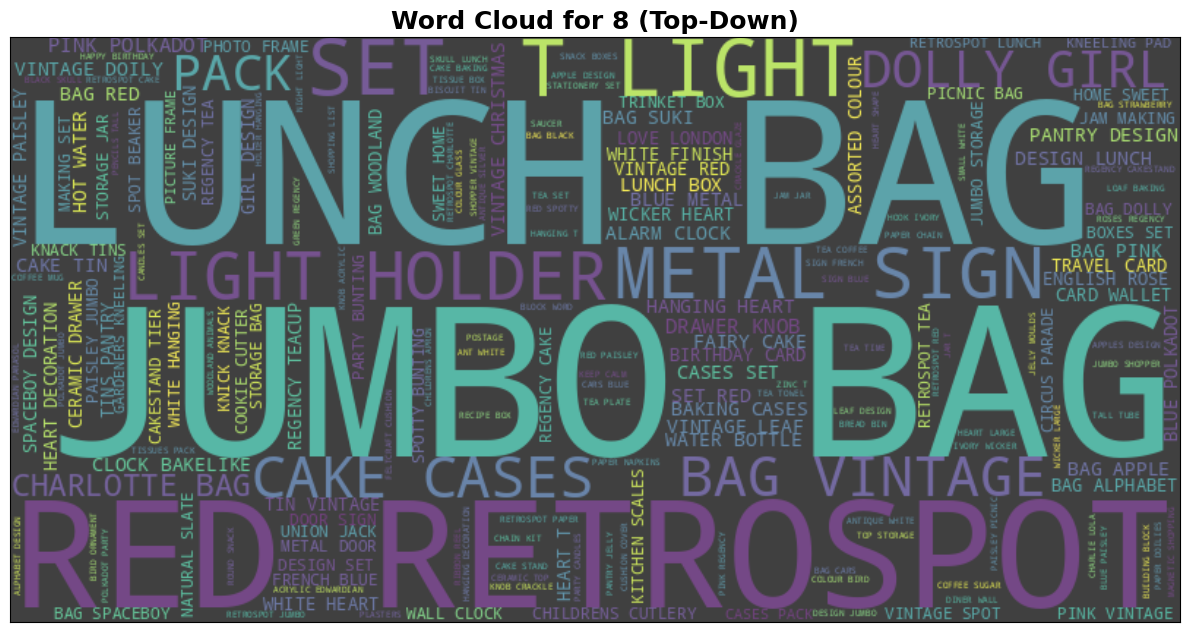

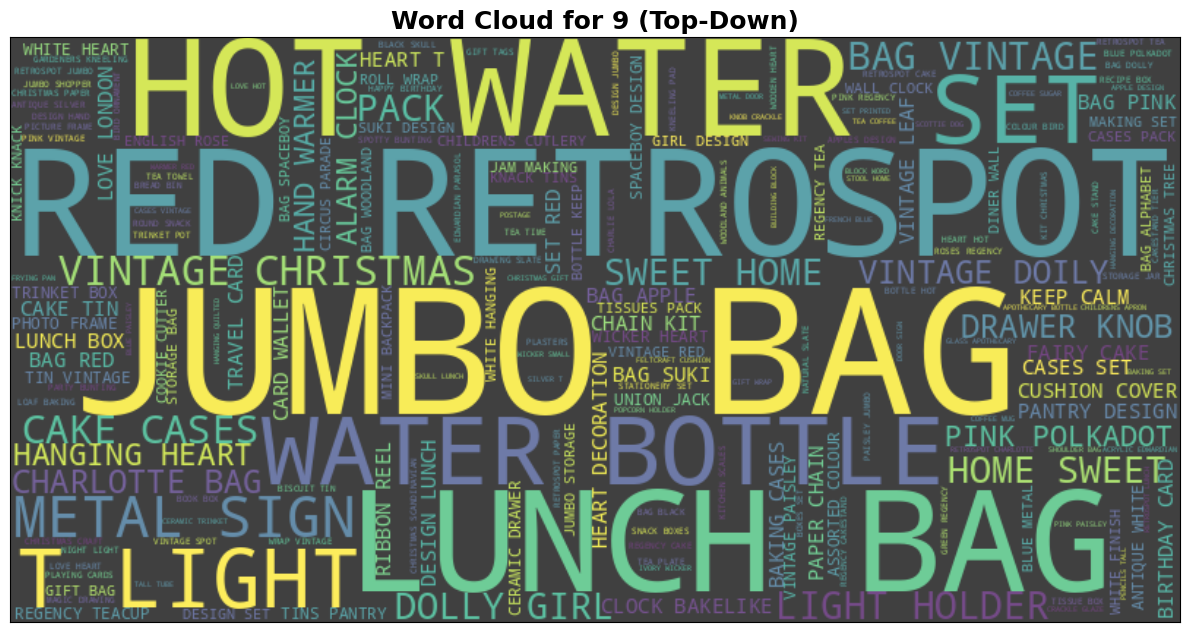

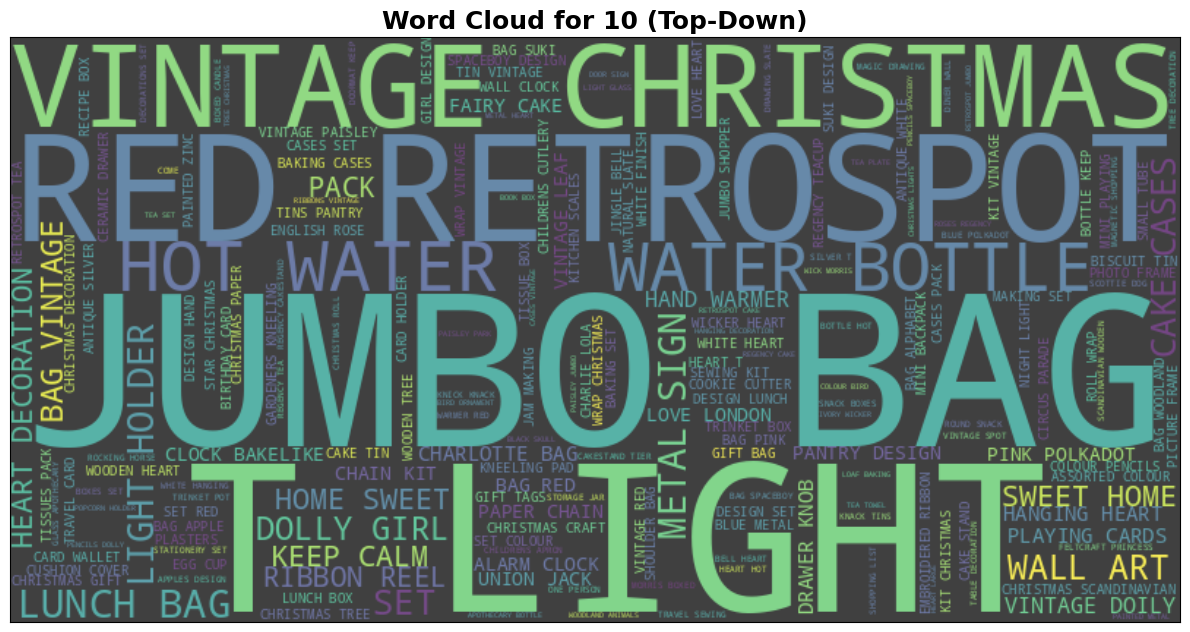

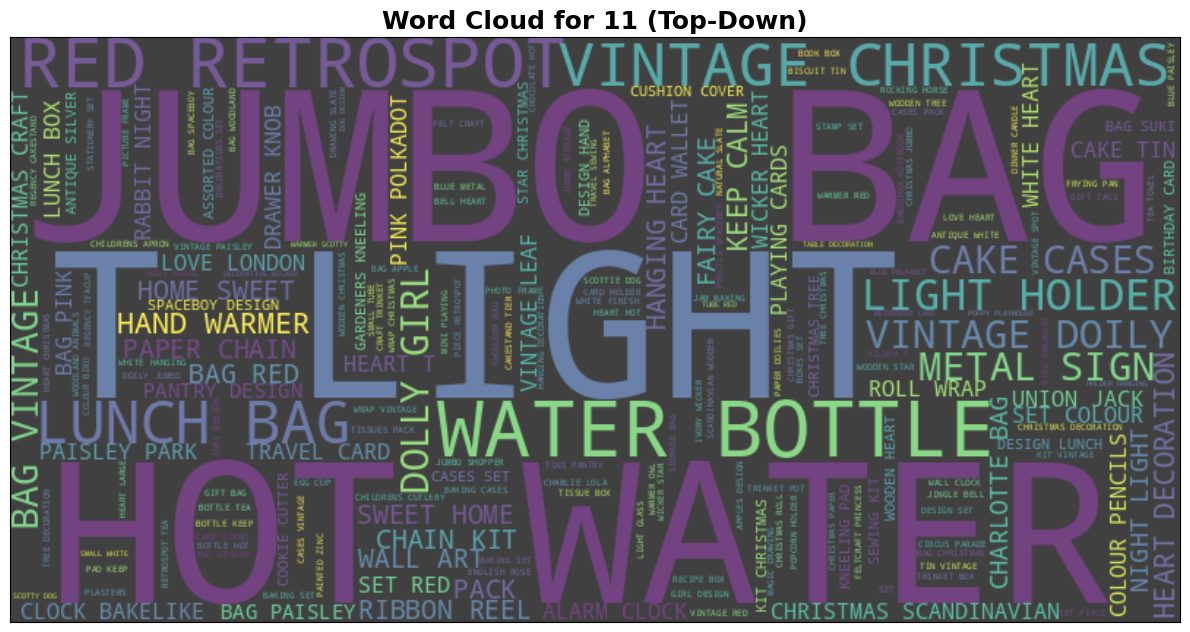

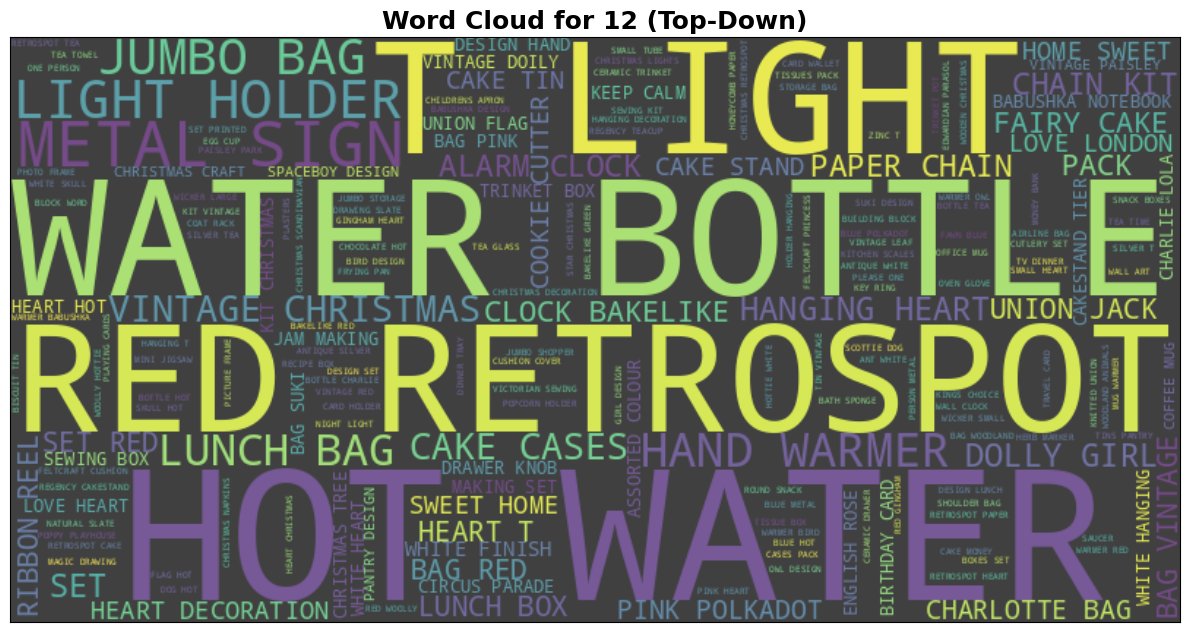

In [ ]:
# Concatenate all the 'Description' values for each month into a single string
text_by_month = df1.groupby('Month')['Description'].apply(lambda x: ' '.join(x.dropna().astype(str).values))

# Loop through each month and display the word cloud in a separate plot
for month, text in text_by_month.items():
    # Create a WordCloud object
    wordcloud = WordCloud(background_color='black', width=800, height=400).generate(text)

    # Create a new plot for the current month
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(wordcloud, interpolation='bilinear', alpha=0.75)
    ax.set_title('Word Cloud for {} (Top-Down)'.format(month), fontsize=18, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.show()


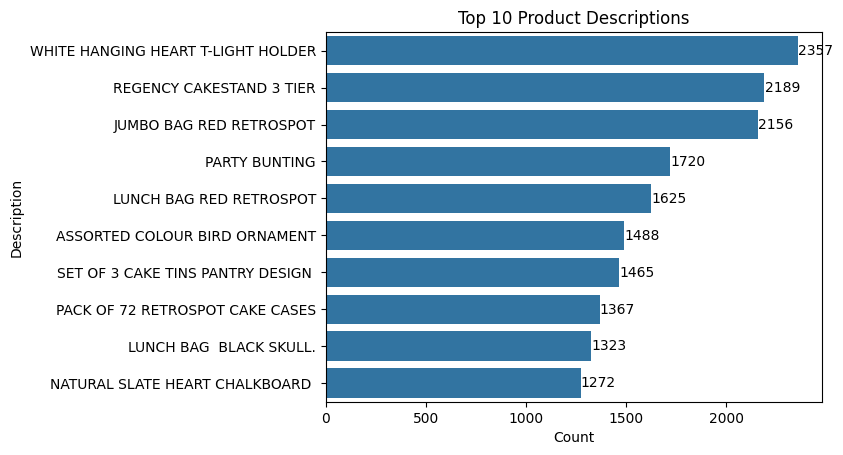

In [ ]:
top_10_descriptions = df1['Description'].value_counts().nlargest(10)

# Create a bar chart using Seaborn
sns.barplot(x=top_10_descriptions.values, y=top_10_descriptions.index)

plt.xlabel('Count')
plt.ylabel('Description')

plt.title('Top 10 Product Descriptions')

# Add annotations for the counts on the bars
for i, count in enumerate(top_10_descriptions.values):
    plt.text(count + 1, i, str(count), ha='left', va='center')

plt.show()


# CORRELATION ANALYSIS

In [ ]:
df1.corr()

<ipython-input-91-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


Quantity  UnitPrice  CustomerID  CharCount      Year     Month  \
Quantity    1.000000  -0.004916   -0.005036  -0.001608  0.003059 -0.001913   
UnitPrice  -0.004916   1.000000   -0.005279  -0.016893 -0.008622 -0.005392   
CustomerID -0.005036  -0.005279    1.000000   0.021501 -0.028298  0.025212   
CharCount  -0.001608  -0.016893    0.021501   1.000000 -0.027212 -0.044442   
Year        0.003059  -0.008622   -0.028298  -0.027212  1.000000 -0.369416   
Month      -0.001913  -0.005392    0.025212  -0.044442 -0.369416  1.000000   
DayOfWeek  -0.002420  -0.009924    0.018443  -0.010054 -0.006175  0.039726   
Sales       0.918153   0.053318   -0.002523  -0.002692  0.000909  0.000405   
Time       -0.015019   0.004209    0.052287   0.028640 -0.010741  0.026116   

            DayOfWeek     Sales      Time  
Quantity    -0.002420  0.918153 -0.015019  
UnitPrice   -0.009924  0.053318  0.004209  
CustomerID   0.018443 -0.002523  0.052287  
CharCount   -0.010054 -0.002692  0.028640  
Year        -0.006175  0.000909 -0.010741  
Month        0.039726  0.000405  0.026116  
DayOfWeek    1.000000 -0.002600 -0.033165  
Sales       -0.002600  1.000000 -0.013538  
Time        -0.033165 -0.013538  1.000000

<ipython-input-92-7f9233009f05>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['Sales'].plot(kind='bar', color ="grey")


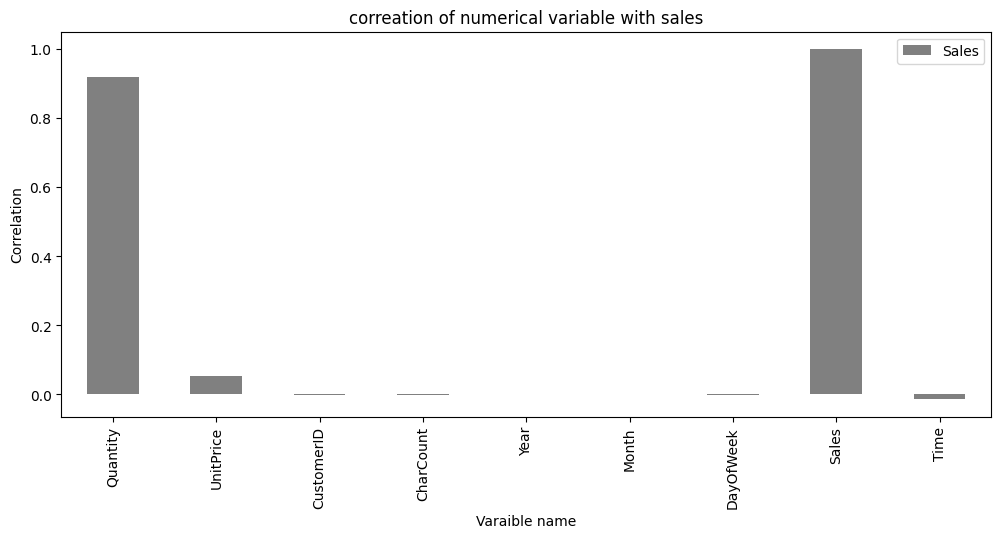

In [ ]:
# ploting a graph of correation of numerical variable with sales
plt.figure(figsize=(12,5))
df1.corr()['Sales'].plot(kind='bar', color ="grey")
plt.xlabel("Varaible name")
plt.ylabel("Correlation")
plt.title("correation of numerical variable with sales")
plt.legend()
plt.show()

In [ ]:
!pip install InstructorEmbedding
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=6697f25e6cedc67091a80515d19fb78ce71806bdc13cab1ffcd8ecfd248506e2
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
from InstructorEmbedding import INSTRUCTOR
model = INSTRUCTOR('hkunlp/instructor-xl')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.40k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

load INSTRUCTOR_Transformer
max_seq_length  512


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sentences_a = ['Safety scissors']
sentences_b = ['SMALL FOLDING SCISSOR(POINTED EDGE)','LARGE CHINESE STYLE SCISSOR','SMALL CHINESE STYLE SCISSOR']
embeddings_a = model.encode(sentences_a)
embeddings_b = model.encode(sentences_b)
similarities = cosine_similarity(embeddings_a,embeddings_b)
print(similarities)

[[0.7218522  0.6901671  0.71720296]]


In [ ]:
# Assuming df1 is your original DataFrame
df_no_duplicates = df1.drop_duplicates(subset='StockCode', keep='first').copy()
df_no_duplicates

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
509369    579297    85179a              GREEN BITTY LIGHT CHAIN         1   
512588    579512     23617  SET 10 CARDS SWIRLY XMAS TREE 17104         2   
527065    580691    90214U            LETTER "U" BLING KEY RING        12   
537224    581238    47591b             SCOTTIES CHILDRENS APRON         1   
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  CharCount  \
0      2010-12-01 08:26:00       2.55       17850  United Kingdom          6   
1      2010-12-01 08:26:00       3.39       17850  United Kingdom          5   
2      2010-12-01 08:26:00       2.75       17850  United Kingdom          6   
3      2010-12-01 08:26:00       3.39       17850  United Kingdom          6   
4      2010-12-01 08:26:00       3.39       17850  United Kingdom          6   
...                    ...        ...         ...             ...        ...   
509369 2011-11-29 11:23:00       2.46       15287  United Kingdom          6   
512588 2011-11-29 16:47:00       2.91       15287  United Kingdom          5   
527065 2011-12-05 15:48:00       0.29       13790  United Kingdom          6   
537224 2011-12-08 10:53:00       4.13       15287  United Kingdom          6   
540421 2011-12-09 09:15:00       2.08       16446  United Kingdom          5   

        Year  Month  DayOfWeek      Sales  Time Time of Day  
0       2010     12          2      15.30     8     Morning  
1       2010     12          2      20.34     8     Morning  
2       2010     12          2      22.00     8     Morning  
3       2010     12          2      20.34     8     Morning  
4       2010     12          2      20.34     8     Morning  
...      ...    ...        ...        ...   ...         ...  
509369  2011     11          1       2.46    11     Morning  
512588  2011     11          1       5.82    16   Afternoon  
527065  2011     12          0       3.48    15   Afternoon  
537224  2011     12          3       4.13    10     Morning  
540421  2011     12          4  168469.60     9     Morning  

[3948 rows x 15 columns]

In [ ]:
# Assuming 'model' is your embedding model
embeddings = df_no_duplicates['Description'].apply(lambda x: model.encode(x))

# Create a new column 'Embedding' in df1
df_no_duplicates['Embedding'] = embeddings

User
i want to make a project for my son where i need to make a small wind mill what all things i need to buy for making the same from the toy/ stationary shop

1. Paper Base
2. Lightweight paper blades
3. Small plastic bottle cap rotor hub
4. Straw tower
5. String for decoration
6. Craft glue
7. Markers or colored pencils for decorating
8. Safety scissors
9. Small beads or buttons for extra decoration (optional)
19. Stickers or cut-out shapes for additional embellishments (optional)

In [ ]:
windmill_project_items = [
    "card sheet",
    "turbines",
    "honeycomb paper",
    "Straw",
    "Decorative string",
    "Glue",
    "water colors",
    "scissors",
    "Stickers"
]

In [ ]:
item_embeddings = model.encode(windmill_project_items)

In [ ]:
def calculate_cosine_similarity(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

In [ ]:
# Initialize lists to store results
items_in_embeddings = []
most_similar_items = []
stockcodes = []

# Iterate over each item in the embeddings list
for i, item_embedding in enumerate(item_embeddings):
    # Calculate cosine similarity with all items in df_no_duplicates
    similarities = df_no_duplicates['Embedding'].apply(lambda x: calculate_cosine_similarity(item_embedding, x))

    # Find the item with the highest similarity
    most_similar_item_index = np.argmax(similarities)

    # Append results to lists
    items_in_embeddings.append(windmill_project_items[i])
    most_similar_items.append(df_no_duplicates.iloc[most_similar_item_index]['Description'])
    stockcodes.append(df_no_duplicates.iloc[most_similar_item_index]['StockCode'])


In [ ]:
# Create a DataFrame with the results
result_df = pd.DataFrame({
    'Original_Item': windmill_project_items,
    'Most_Similar_Item': most_similar_items,
    'StockCode': stockcodes
})

In [ ]:
# Print the result DataFrame
result_df

Original_Item                    Most_Similar_Item StockCode
0         card sheet        ALPHABET HEARTS STICKER SHEET     21723
1           turbines                     DOLPHIN WINDMILL     77079
2    honeycomb paper          WHITE BELL HONEYCOMB PAPER      21192
3              Straw         PACK OF 6 SMALL FRUIT STRAWS     23120
4  Decorative string     GLITTER HANGING BUTTERFLY STRING     20829
5               Glue            PACK OF 12 STICKY BUNNIES     21383
6       water colors          WOODEN SCHOOL COLOURING SET     22561
7           scissors  SMALL FOLDING SCISSOR(POINTED EDGE)     16008
8           Stickers                      ANIMAL STICKERS     16011